In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from scipy.misc import imread
from collections import namedtuple
import caffe
#from datasets.pascal_voc import pascal
import sys

sys.path.insert(0,"/home/s4746627/clockwork-fcn")
sys.path.insert(0,"/home/s4746627/clockwork-fcn/nets")
from nets import ade_layers

from lib import run_net
from lib import score_util
from lib import plot_util

ADE = os.path.abspath('/home/s4746627/ADE20K_aug')

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()

/home/s4746627/ADE20K_aug/ADE_train_00009610_aug_8.png
/home/s4746627/ADE20K_aug/ADE_train_00003608_aug_11_seg.png


/home/s4746627/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


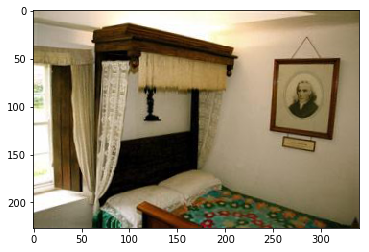

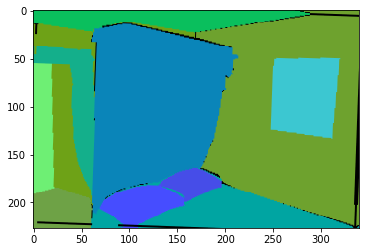

In [3]:
ade_im = open('{}/training.txt'.format(ADE)).read().splitlines()
image = imread(ade_im[1])

print(ade_im[3])
base, _ = os.path.splitext(ade_im[1])
label_file = "{}_seg.png".format(base)
print(label_file)

image_label = mpimg.imread(label_file)
plt.imshow(image.astype('uint8'))
plt.figure()
plt.imshow(image_label)

In [4]:
# Get corresponding label
def get_label(im_name):
    base, _ = os.path.splitext(ade_im[5])
    label_file = "{}_seg.png".format(base)
    image_label = mpimg.imread(label_file)
    return image_label

In [ ]:
def image_inference(method, shift, arch, weights, infer, offset, id):
    net = caffe.Net(arch, weights, caffe.TEST)
    out = []
    
    im, label = imread(ade_im[id]), get_label(ade_im[id])
    
    
    '''
    im_frames, label_frames = PV.make_translated_frames(im, label, shift=shift, num_frames=num_frames)
    im_frames, label_frames = im_frames[offset:], label_frames[offset:]
        
    run_net.pipeline_fill_3stage(net, PV.preprocess(im_frames[0]), PV.preprocess(im_frames[1]))
    im_frames, label_frames = im_frames[2:], label_frames[2:]
    
    for im_t, label_t in zip(im_frames, label_frames):
        out.append(infer(net, PV.preprocess(im_t)))

    plt.figure()
    for i, im in enumerate(im_frames):
        plt.subplot(1, len(im_frames), i + 1)
        #figsize=(6,3)
        plt.imshow(im)
        plt.axis('off')
        #plt.tight_layout()
    plt.figure()
    for i, label in enumerate(label_frames):
        plt.subplot(1, len(label_frames), i + 1)
        plt.imshow(PV.palette(label))
        plt.axis('off')
        #plt.tight_layout()
    
    plt.figure()
    for i, label in enumerate(out):
        plt.subplot(1, len(out), i + 1)
        #plt.imshow(PV.palette(label))
        plt.imshow(label)
        plt.axis('off')
        #plt.tight_layout()
    '''
    im = im[:,:50, :50]
    im_input = im[np.newaxis, np.newaxis, :, :]

    net.blobs['data'].reshape(*im_input.shape)
    net.blobs['data'].data[...] = im_input

    output = net.forward()
    
    
    image_label = mpimg.imread(label_file)
    plt.imshow(im.astype('uint8'))
    plt.figure()
    plt.imshow(label)
    plt.figure()
    plt.imshow(output)
    

Method = namedtuple('Method', 'method arch weights infer_func, input_offset')
pipeline_3stage_ade = Method('pipeline_3stage_ade', '../nets/ade-fcn8s.prototxt', '../nets/fcn8s-heavy-pascal-copy.caffemodel', run_net.pipeline_3stage_forward, 0)
m = pipeline_3stage_ade

for id in range(1):
    image_inference(m.method, 16, m.arch, m.weights, m.infer_func, m.input_offset, id)